In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec

unable to import 'smart_open.gcs', disabling that module


## LOAD THE DATA SET

In [2]:
data=pd.read_csv('train.tsv', sep='\t')
print("shape",data.shape)
data.head(5)

shape (1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [3]:
data.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


## Now we will check for NULl values as this is an imp part for giving accurate results in the prediction

In [5]:
data.isnull().any()

train_id             False
name                 False
item_condition_id    False
category_name         True
brand_name            True
price                False
shipping             False
item_description      True
dtype: bool

## category_name,brand_name,item_description have null values

In [6]:
def fill_the_null(data):
    data.category_name.fillna(value = "Others", inplace = True)
    data.brand_name.fillna(value = "Not known", inplace = True)
    data.item_description.fillna(value = "No description given", inplace = True)
    return data
    

In [7]:
train=fill_the_null(data)

In [8]:
train.isnull().any()

train_id             False
name                 False
item_condition_id    False
category_name        False
brand_name           False
price                False
shipping             False
item_description     False
dtype: bool

## Loading the test file

In [9]:
test = pd.read_csv('test_stg2.tsv', sep='\t')
# data= data[1:1000]
print("shape",np.shape(test))
test.head(5)

shape (3460725, 7)


,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3460725 entries, 0 to 3460724
Data columns (total 7 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   test_id            int64 
 1   name               object
 2   item_condition_id  int64 
 3   category_name      object
 4   brand_name         object
 5   shipping           int64 
 6   item_description   object
dtypes: int64(3), object(4)
memory usage: 184.8+ MB


## Checking for null values in data

In [11]:
test.isnull().any()

test_id              False
name                 False
item_condition_id    False
category_name         True
brand_name            True
shipping             False
item_description      True
dtype: bool

## category_name,brand_name,item_description have null values

In [12]:
test=fill_the_null(test)

In [13]:
test.isnull().any()

test_id              False
name                 False
item_condition_id    False
category_name        False
brand_name           False
shipping             False
item_description     False
dtype: bool

## Now there are no null values

# univariate data anlysis

In [14]:
train.price.describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

In [15]:
X=data

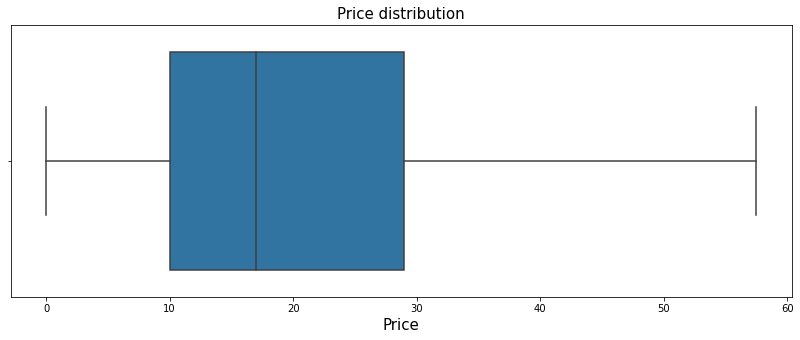

In [16]:
fig, ax = plt.subplots(figsize=(14,5))
plt.title('Price distribution', fontsize=15)
sns.boxplot(X.price,showfliers=False)
ax.set_xlabel('Price',fontsize=15)

plt.show()

## We can see most of the items have the price value between 25-28.And all the items have their price listings between 10-28

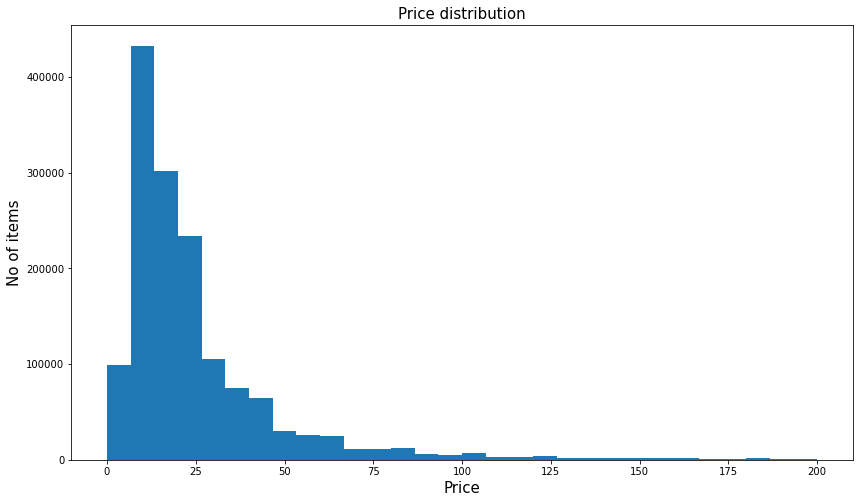

In [17]:
fig, ax = plt.subplots(figsize=(14,8))
ax.hist(train.price,bins=30,range=[0,200],label="Price")
plt.title('Price distribution', fontsize=15)
ax.set_xlabel('Price',fontsize=15)
ax.set_ylabel('No of items',fontsize=15)

plt.show()

## It reveals most of the items have their prices between 15-22.but as its a bit skewed so we will use log to see the change in distribution


In [18]:
#We will add log(price) as a column in our train data
train["logPrice"] = np.log(train["price"]+1)

In [19]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,logPrice
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Not known,10.0,1,No description yet,2.397895
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Not known,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Not known,44.0,0,Complete with certificate of authenticity,3.806662


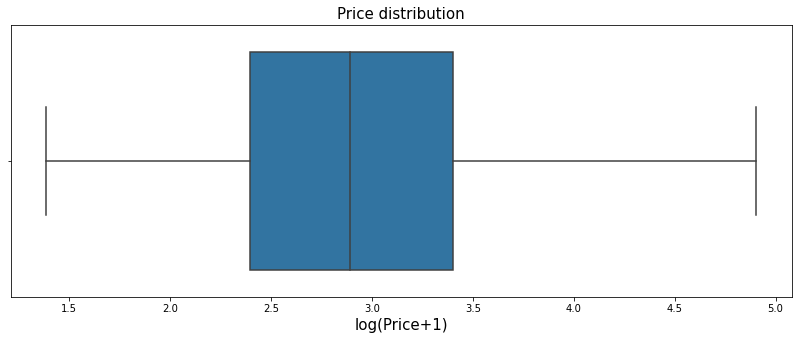

In [20]:
fig, ax = plt.subplots(figsize=(14,5))
plt.title('Price distribution', fontsize=15)
sns.boxplot(train.logPrice,showfliers=False)
ax.set_xlabel('log(Price+1)',fontsize=15)

plt.show()


## We have scaled down our 'price' feature logprice. We have added log(Price+1) to it as log(0) is undefined. hence if price for an item is 0, then the item will have no price as defined.

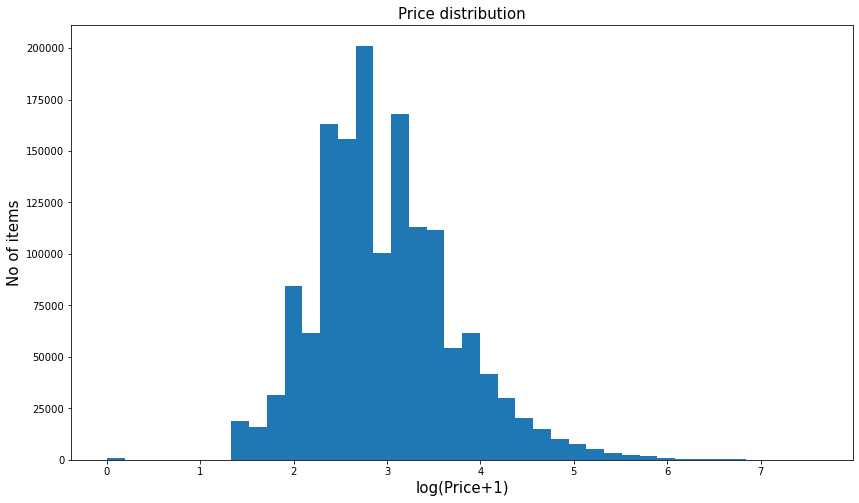

In [21]:
fig, ax = plt.subplots(figsize=(14,8))
ax.hist(train.logPrice,bins=40,label="Price")
plt.title('Price distribution', fontsize=15)
ax.set_xlabel('log(Price+1)',fontsize=15)
ax.set_ylabel('No of items',fontsize=15)

plt.show()

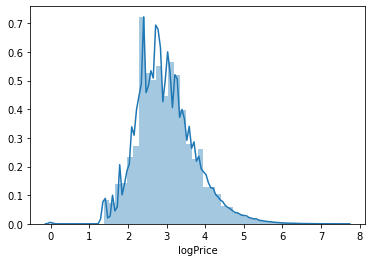

In [22]:
sns.distplot(train.logPrice)

In [23]:
train['train_id'].count()

1482535

## The 'log(price+1)' feature has the price range spread over 2.4-3.7 for most of the items

## Shipping

In [24]:
print("0: shipping charges paid by seller")
print("1: shipping charges paid by buyers")
print("COUNT:\n",train['shipping'].value_counts())
print("Fraction:\n",train['shipping'].value_counts(normalize=True))

0: shipping charges paid by seller
1: shipping charges paid by buyers
COUNT:
 0    819435
1    663100
Name: shipping, dtype: int64
Fraction:
 0    0.552726
1    0.447274
Name: shipping, dtype: float64


In [25]:
seller_charged = []
buyer_charged = []
for i in (range(0,len(train['shipping']))):
    if train['shipping'][i]==0:
        seller_charged.append(train['logPrice'][i])
    else:
        buyer_charged.append(train['logPrice'][i])

In [26]:
print(len(seller_charged))
print(len(buyer_charged))

819435
663100


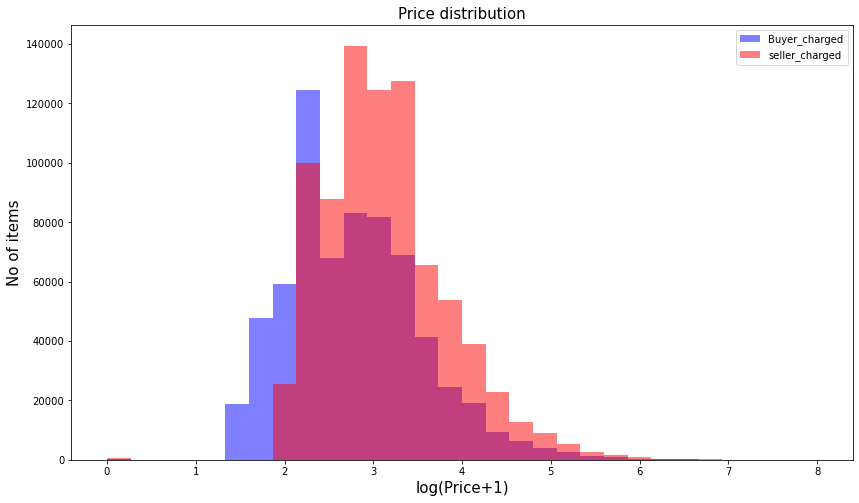

In [27]:
#Ref: https://stackoverflow.com/questions/6871201/plot-two-histograms-at-the-same-time-with-matplotlib
#Ref: https://stackoverflow.com/questions/28398200/matplotlib-plotting-transparent-histogram-with-non-transparent-edge
fig, ax = plt.subplots(figsize=(14,8))
ax.hist(buyer_charged,bins=30,range=[0,8],label="Buyer_charged",color='b',alpha=0.5)
ax.hist(seller_charged,bins=30,range=[0,8],label="seller_charged",color='r',alpha=0.5)
plt.title('Price distribution', fontsize=15)
ax.set_xlabel('log(Price+1)',fontsize=15)
ax.set_ylabel('No of items',fontsize=15)
plt.legend()

plt.show()

## Here, we can see that for items which have lesser price, the shipping had to be paid by the buyer for profit reasons. Also, as the price increases, we can see that the shipping charges have been paid by the seller.. And there is a lot of overlap for items where both buyer and seller have been charged.

## Item category

In [28]:
print("No of unique values in item category is:",train['category_name'].nunique())

No of unique values in item category is: 1288


In [29]:
print("Top-10 unique category by frequency:\n\n",train['category_name'].value_counts()[:10])

Top-10 unique category by frequency:

 Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29910
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Women/Underwear/Bras                                           21274
Women/Tops & Blouses/Tank, Cami                                20284
Women/Tops & Blouses/Blouse                                    20284
Name: category_name, dtype: int64


In [30]:
def cat_split(row):
    try:
        text = row
        text1, text2, text3 = text.split('/')
        return text1, text2, text3
    except:
        return ("Label not given", "Label not given", "Label not given")

In [31]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,logPrice
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Not known,10.0,1,No description yet,2.397895
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Not known,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Not known,44.0,0,Complete with certificate of authenticity,3.806662


In [32]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,logPrice
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Not known,10.0,1,No description yet,2.397895
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Not known,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Not known,44.0,0,Complete with certificate of authenticity,3.806662


In [33]:
# train.drop(['price', 'train_id','logPrice','description_len','negative', 'neutral','positive'], axis=1, inplace=True)

In [34]:
# my_data=train
# my_data.to_csv('Mercari_df.csv')

In [35]:
train['general_cat'], train['subcat_1'], train['subcat_2'] = \
zip(*train['category_name'].apply(lambda x: cat_split(x)))
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,logPrice,general_cat,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Not known,10.0,1,No description yet,2.397895,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Not known,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Not known,44.0,0,Complete with certificate of authenticity,3.806662,Women,Jewelry,Necklaces


In [36]:
test['general_cat'], test['subcat_1'], test['subcat_2'] = \
zip(*test['category_name'].apply(lambda x: cat_split(x)))


In [37]:
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description,general_cat,subcat_1,subcat_2
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,Not known,1,Size 7,Women,Jewelry,Rings
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,Not known,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined...",Other,Office supplies,Shipping Supplies
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...,Vintage & Collectibles,Bags and Purses,Handbag
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,Not known,0,-floral kimono -never worn -lightweight and pe...,Women,Sweaters,Cardigan
4,4,Life after Death,3,Other/Books/Religion & Spirituality,Not known,1,Rediscovering life after the loss of a loved o...,Other,Books,Religion & Spirituality


In [38]:
print("No of unique values in main category: ",train['general_cat'].nunique())
print("No of unique values in Sub_category1: ",train['subcat_1'].nunique())
print("No of unique values in Sub_category2: ",train['subcat_2'].nunique())

No of unique values in main category:  11
No of unique values in Sub_category1:  114
No of unique values in Sub_category2:  865


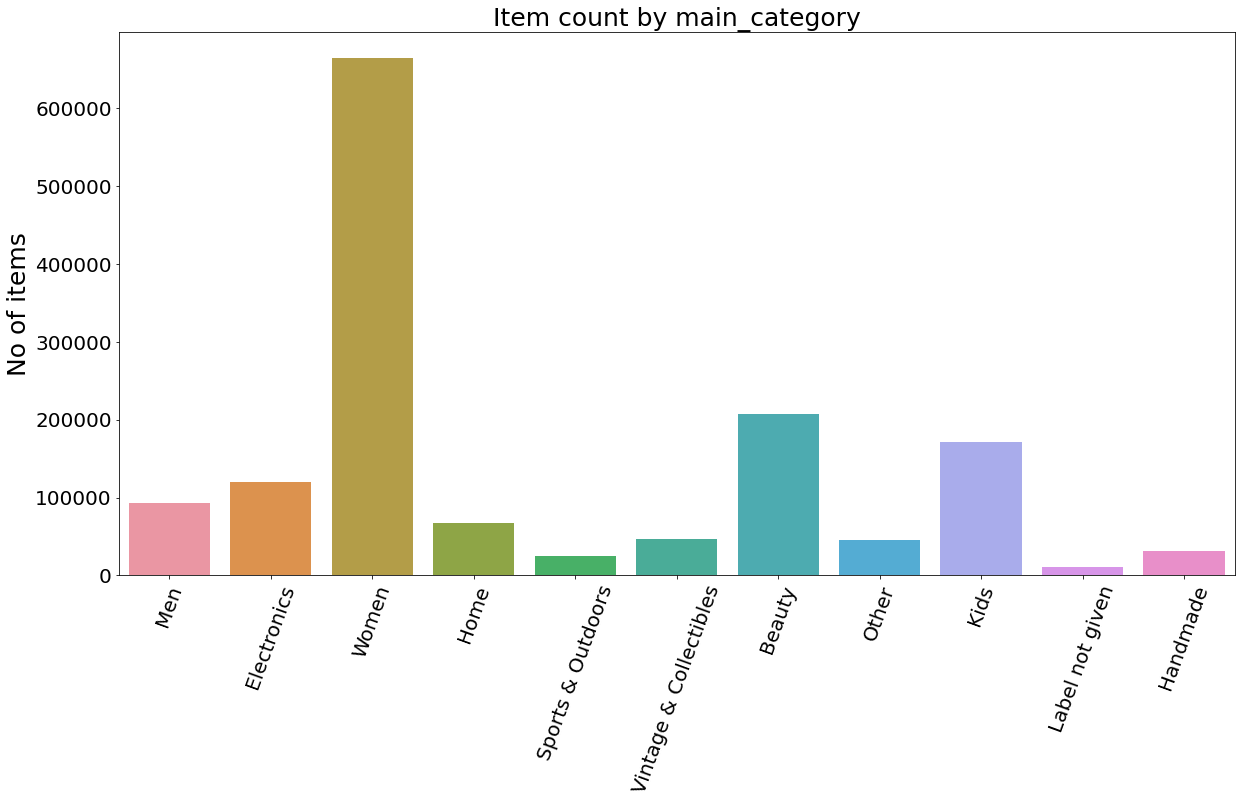

In [39]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='general_cat', data=train, ax=ax)
plt.title('Item count by main_category',fontsize=25)
plt.ylabel('No of items',fontsize=25)
plt.xlabel('')
plt.xticks(rotation=70,fontsize=20)
plt.yticks(fontsize=20)

plt.show()

## From this plot, we can conclude that items of women has the maximum number in main category.

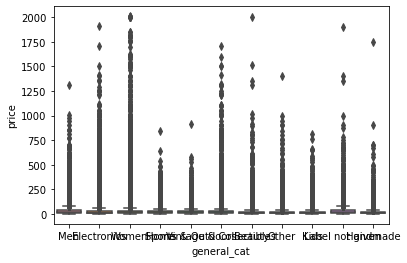

In [40]:
sns.boxplot(x=train.general_cat,y=train.price,orient='v')

Top-10 subcategory_1:


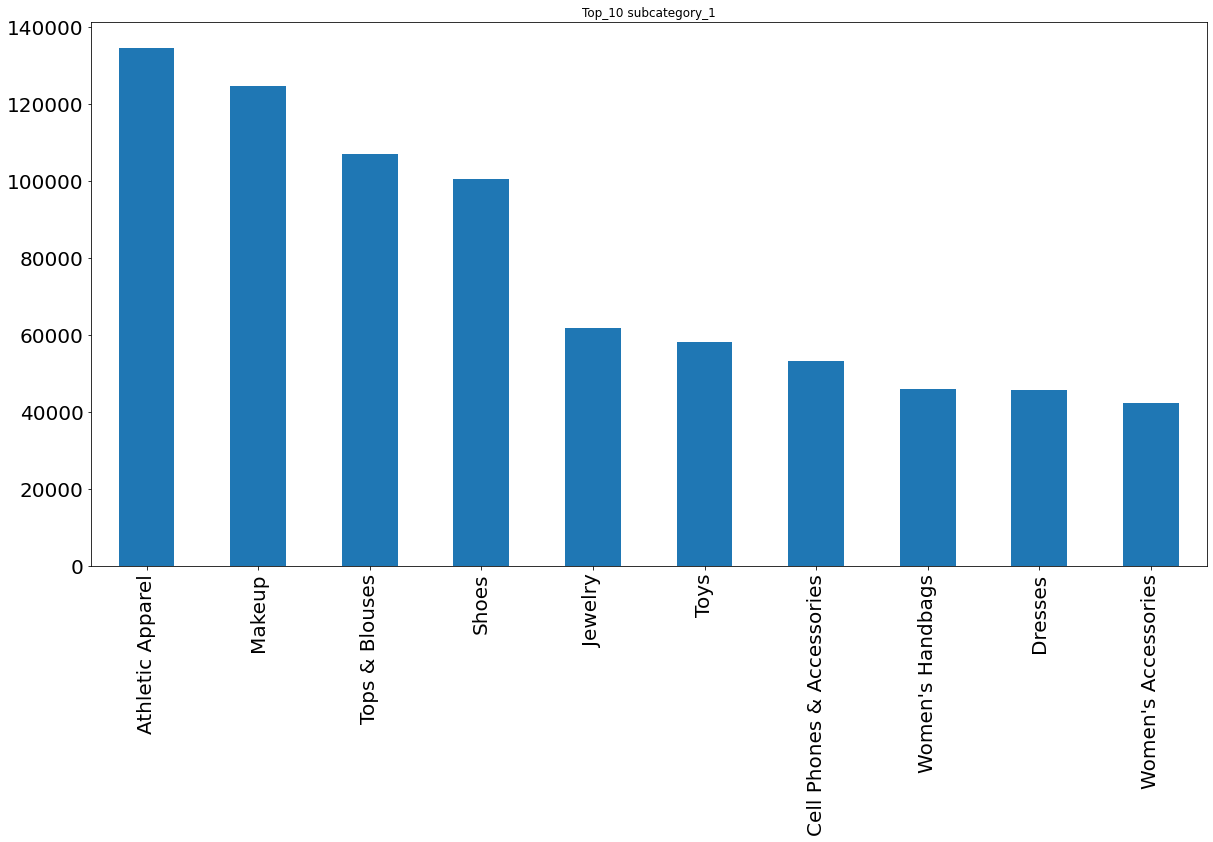

In [41]:
print("Top-10 subcategory_1:")
train.subcat_1.value_counts()[:10].plot(kind = 'bar',figsize = (20,10), title="Top_10 subcategory_1",fontsize=20)

## Here, it lists the top 10 items with greatest frequencies in sub-category 1

Top-10 subcategory_2:


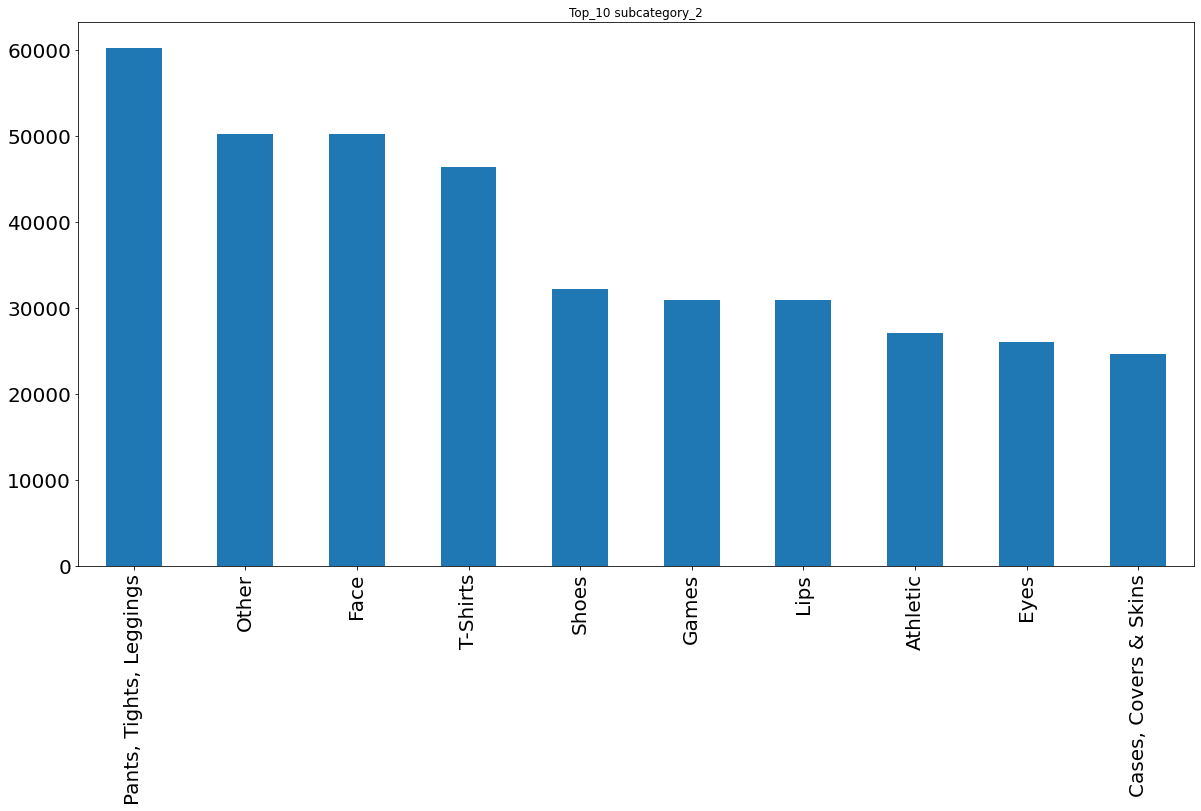

In [42]:
print("Top-10 subcategory_2:")
train.subcat_2.value_counts()[:10].plot(kind = 'bar',figsize = (20,10), title="Top_10 subcategory_2",fontsize=20)

## Here, it lists the top 10 items with greatest frequencies in sub-category 2

In [43]:
print("No of unique brands: ",train['brand_name'].nunique())

No of unique brands:  4810


Top-10 brands by frequency of sale:


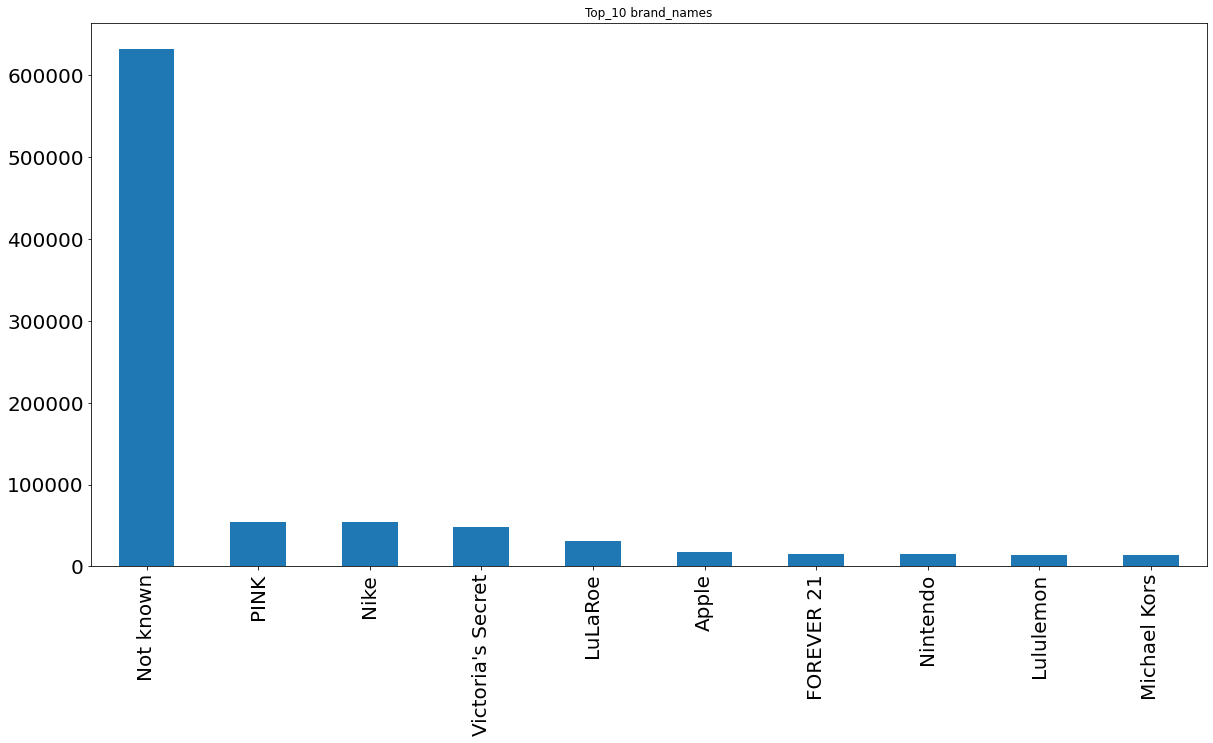

In [44]:
print("Top-10 brands by frequency of sale:")
train.brand_name.value_counts()[:10].plot(kind = 'bar',figsize = (20,10), title="Top_10 brand_names",fontsize=20)

## Brand name

In [45]:
print("No of unique brands: ",train['brand_name'].nunique())

No of unique brands:  4810


Top-10 brands by frequency of sale:


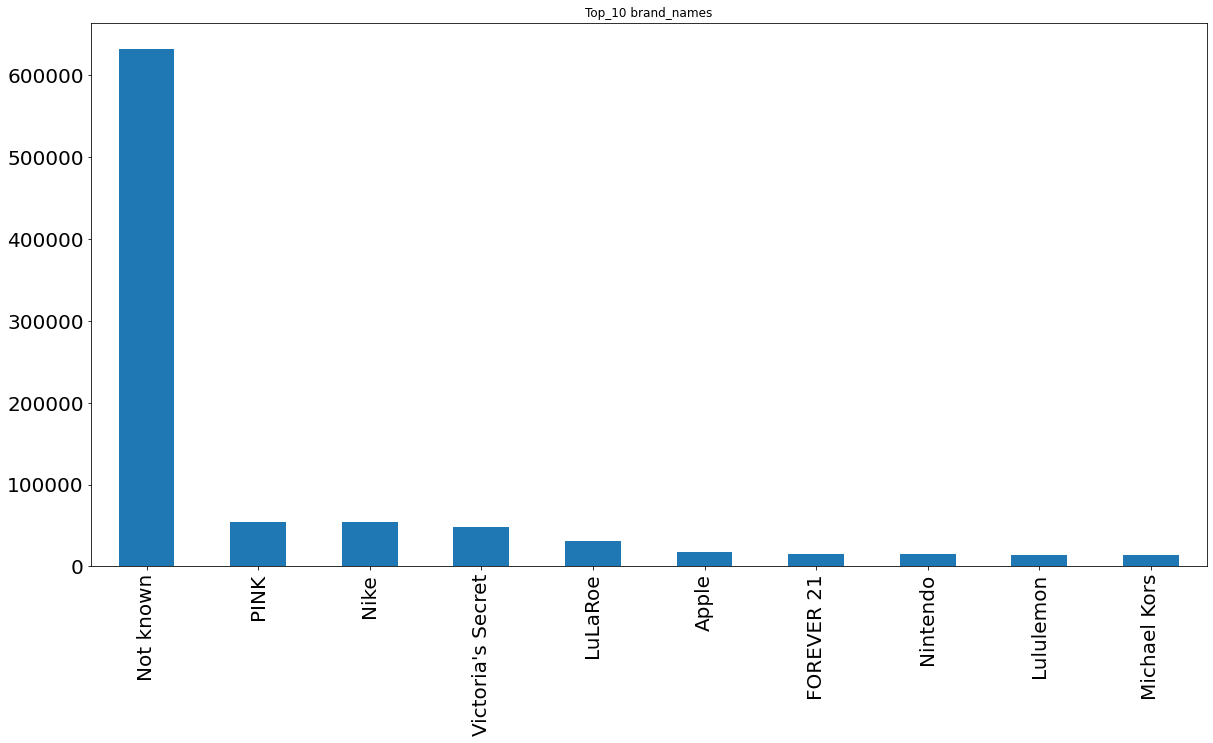

In [46]:
print("Top-10 brands by frequency of sale:")
train.brand_name.value_counts()[:10].plot(kind = 'bar',figsize = (20,10), title="Top_10 brand_names",fontsize=20)

## For most of the items, the brand name has not been listed can be deduced from the plot. Second to it, most number of items have 'Pink' and "Nike" as brand names.

## Item description

In [47]:
def length(description):
    count = 0
    for i in description.split():
        count+=1
    return count

In [48]:
dec = []
for i in train['item_description']:
    temp = []
    temp.append(i)
    temp.append(length(str(i)))
    dec.append(temp)

print(dec[1])
print(len(dec))

['This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.', 36]
1482535


In [49]:
mydf = pd.DataFrame(dec,columns=['desc','desc_length'])
print(mydf.head(2))

                                                desc  desc_length
0                                 No description yet            3
1  This keyboard is in great condition and works ...           36


In [50]:
train['description_len'] = mydf['desc_length']

In [51]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,logPrice,general_cat,subcat_1,subcat_2,description_len
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Not known,10.0,1,No description yet,2.397895,Men,Tops,T-shirts,3
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,Electronics,Computers & Tablets,Components & Parts,36
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,Women,Tops & Blouses,Blouse,29
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Not known,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519,Home,Home Décor,Home Décor Accents,32
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Not known,44.0,0,Complete with certificate of authenticity,3.806662,Women,Jewelry,Necklaces,5


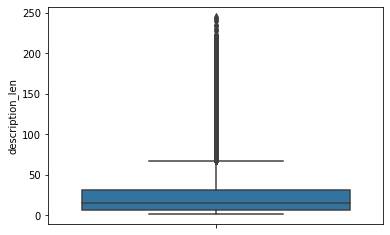

In [52]:
sns.boxplot(x=train.description_len,orient='v')

## The box-plot of decsription length shows that most of the tiems have description length ranging between 15-40 words.

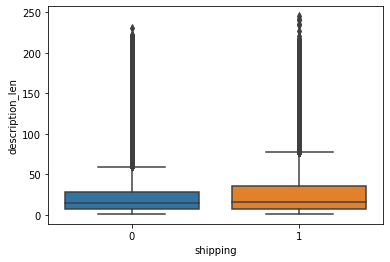

In [53]:
sns.boxplot(y=train.description_len,x=train.shipping,orient='v')

Text(10.331005859374997, 0.5, 'shipping')

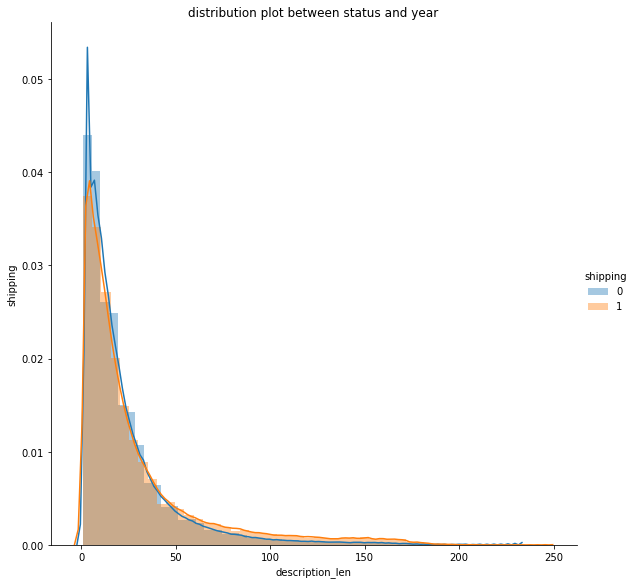

In [54]:
sns.FacetGrid(train,hue='shipping',size=8) \
   .map(sns.distplot,'description_len')  \
   .add_legend()
plt.title('distribution plot between status and year')
plt.ylabel('shipping')

## As length increases, price charged becomes less. Most of the items with lesser description length have more price value.

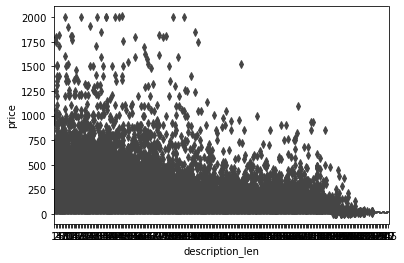

In [55]:
sns.boxplot(x=train.description_len,y=train.price,orient='v')

Top-10 item_descriptions by frequency:


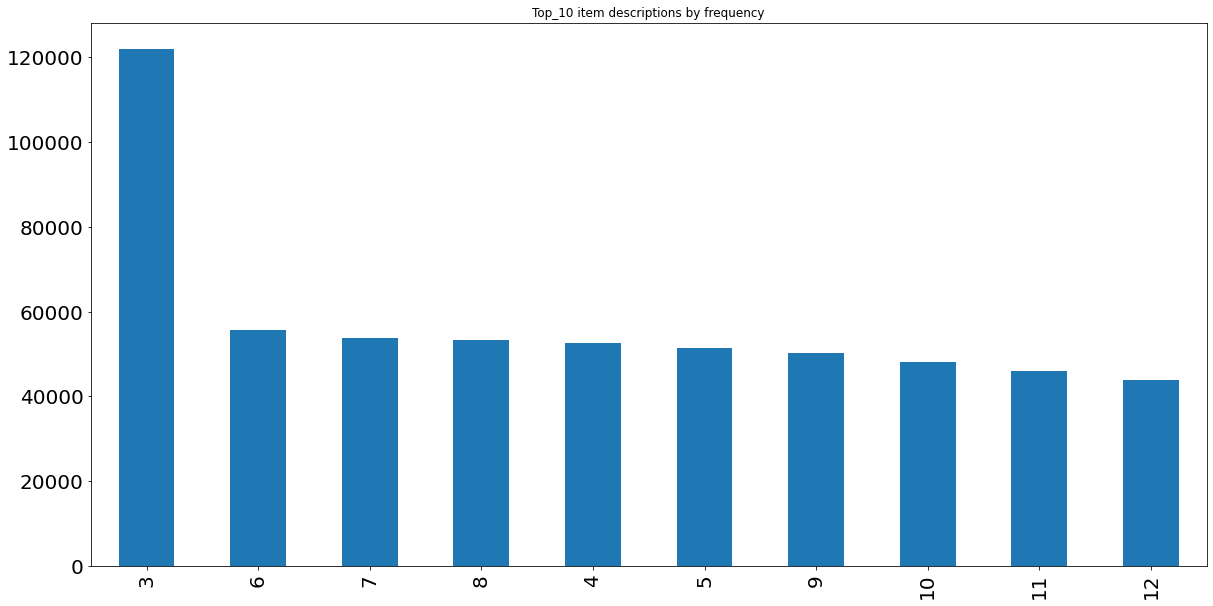

In [56]:
print("Top-10 item_descriptions by frequency:")
train.description_len.value_counts()[:10].plot(kind = 'bar',figsize = (20,10),title="Top_10 item descriptions by frequency",fontsize=20)

(-0.5, 1199.5, 899.5, -0.5)

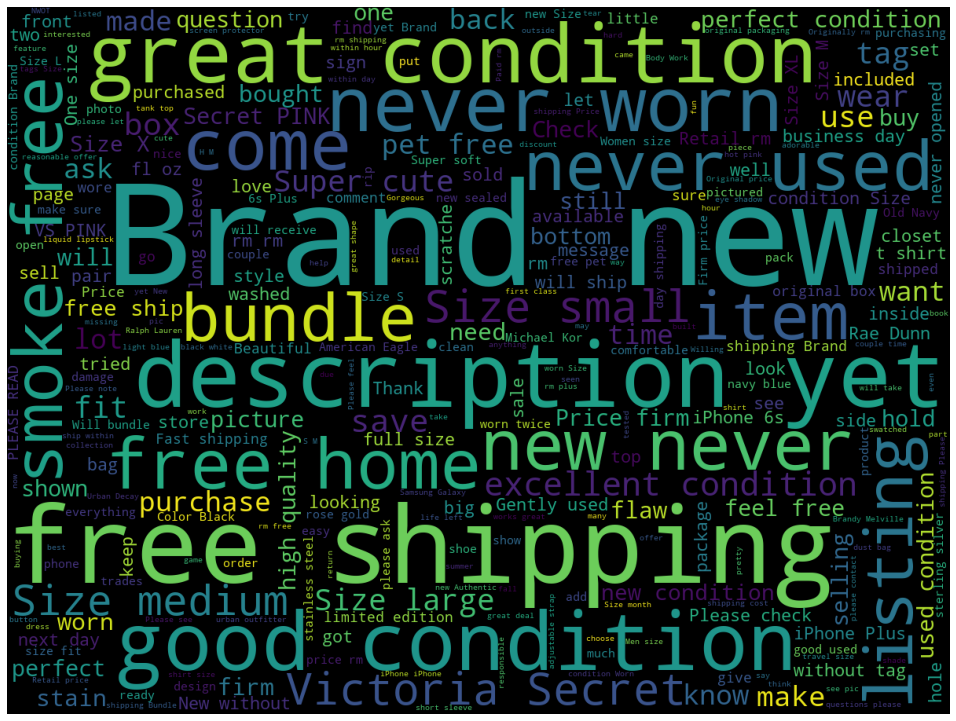

In [57]:
wc = WordCloud(max_words=300,width = 1200, height = 900).generate(" ".join(train.item_description.astype(str)))
plt.figure(figsize = (18, 13))
plt.imshow(wc)
plt.axis("off")


## Basic Feature Engineering and Preprocessing

In [58]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [59]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Avinav.s\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
stopword=set(stopwords.words("english"))

## Calculating sentiment score on item description as a feature

In [61]:
def clean_html(data):
    cleanr=re.compile('<.*?>')
    cleantext=re.sub(cleanr ,' ',data)
    return cleantext

In [62]:
train["item_description"][100]

"What goes better with summer than tacos & tequila? Chill out with friends sporting this great beachwear cover or wear as a stand alone with that oh so sexy bralette or bikini top! Don't forget your cool shades! Great condition! Worn once, no stains, holes, rips or treats."

## as these needs some cleaning removing special characters

In [63]:
from tqdm import tqdm
preprocessed_total_train = []
# tqdm is for printing the status bar
for sentance in tqdm(train['item_description'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopword)
    preprocessed_total_train.append(sent.lower().strip())

# after preprocesing
preprocessed_total_train[20000]

100%|█████████████████████████████████████████████████████████████████████| 1482535/1482535 [01:27<00:00, 17028.06it/s]


'minor flaws check pic condition bundle save'

In [64]:
sno=nltk.stem.SnowballStemmer('english')

In [65]:
print(sno.stem("tasty"))

tasti


In [66]:
train["item_description"][1000]

"Gift card for sephora has 25 dollars on it Have no use for it got it as a Christmas gift and I don't like that store tbh When purchased I can either ship you the card or just give you the information if you want to use it online buyers choice"

In [67]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')


In [68]:
from sklearn.cluster import KMeans


In [69]:
X = vectorizer.fit_transform(train["item_description"])

In [70]:
# true_k = 2
# model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
# model.fit(X)


In [71]:
# order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()

In [72]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

train_sentiment = []; 
for sentence in tqdm(preprocessed_total_train):
    for_sentiment = sentence
    ss = sid.polarity_scores(for_sentiment)
    train_sentiment.append(ss)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Avinav.s\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
100%|██████████████████████████████████████████████████████████████████████| 1482535/1482535 [08:21<00:00, 2956.58it/s]


In [73]:
negative=[]
neutral=[]
positive=[]
for i in train_sentiment:
    
    for polarity,score in i.items():
        if(polarity=='neg'):
            negative.append(score)
        if(polarity=='neu'):
            neutral.append(score)
        if(polarity=='pos'):
            positive.append(score)
       

In [74]:
train['negative']=negative
train['neutral']=neutral
train['positive']=positive

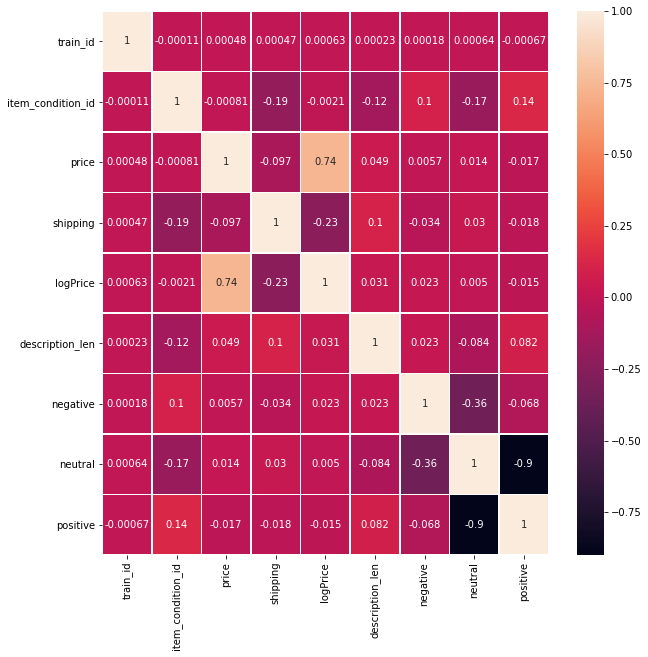

In [75]:
columns = list(train.columns)
plt.figure(figsize = (10, 10))
sns.heatmap(train[columns].corr(), annot = True, linewidth = 0.5)
plt.show()

## We can see that description length has a fair correleation with the price of an item. Hence, we will include this as an additional feature in the features list.

## Also, features of sentiment score share some correlation with the target variable 'Price'. Hence we are including sentiment score on item description as an additional feature

In [76]:
y_train = np.log(train["price"]+1)
train_ids = train['train_id'].values.astype(np.int32)
train.drop(['price', 'train_id','logPrice','description_len','negative', 'neutral','positive'], axis=1, inplace=True)

In [77]:
train.head()

,name,item_condition_id,category_name,brand_name,shipping,item_description,general_cat,subcat_1,subcat_2
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Not known,1,No description yet,Men,Tops,T-shirts
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Not known,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Not known,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [78]:
train.head()

,name,item_condition_id,category_name,brand_name,shipping,item_description,general_cat,subcat_1,subcat_2
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Not known,1,No description yet,Men,Tops,T-shirts
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Not known,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Not known,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [79]:
train.head()


,name,item_condition_id,category_name,brand_name,shipping,item_description,general_cat,subcat_1,subcat_2
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Not known,1,No description yet,Men,Tops,T-shirts
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Not known,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Not known,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [80]:
test_ids = test['test_id'].values.astype(np.int32)
test.drop(['test_id'], axis=1, inplace=True)

In [81]:
train["price"]=y_train

In [82]:
train.head()

,name,item_condition_id,category_name,brand_name,shipping,item_description,general_cat,subcat_1,subcat_2,price
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Not known,1,No description yet,Men,Tops,T-shirts,2.397895
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,3.970292
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,2.397895
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Not known,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,3.583519
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Not known,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,3.806662


In [83]:
my_data=train
# my_data.to_csv('Mercari_df1.csv')

In [84]:
train.head()

,name,item_condition_id,category_name,brand_name,shipping,item_description,general_cat,subcat_1,subcat_2,price
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Not known,1,No description yet,Men,Tops,T-shirts,2.397895
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,3.970292
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,2.397895
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Not known,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,3.583519
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Not known,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,3.806662


## Splitting the dataset into train and test

In [85]:
X=train 
y=y_train

In [86]:
from sklearn.model_selection import train_test_split
df_train, df_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
from tqdm import tqdm
preprocessed_test_des = []
# tqdm is for printing the status bar
for sentance in tqdm(df_test['item_description'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopword)
    preprocessed_test_des.append(sent.lower().strip())

# after preprocesing
preprocessed_test_des[20000]

100%|███████████████████████████████████████████████████████████████████████| 296507/296507 [00:12<00:00, 23480.09it/s]


'three near mint erikas venusaur first edition holo'

In [88]:
from tqdm import tqdm
preprocessed_train_des = []
# tqdm is for printing the status bar
for sentance in tqdm(df_train['item_description'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopword)
    preprocessed_train_des.append(sent.lower().strip())

# after preprocesing
preprocessed_train_des[20000]

100%|█████████████████████████████████████████████████████████████████████| 1186028/1186028 [00:48<00:00, 24448.28it/s]


'brand new received gift opened box thinking would keep decided stick two faced setting powder'

In [89]:
from tqdm import tqdm
preprocessed_test = []
# tqdm is for printing the status bar
for sentance in tqdm(test['item_description'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopword)
    preprocessed_test.append(sent.lower().strip())

# after preprocesing
preprocessed_test[20000]

100%|█████████████████████████████████████████████████████████████████████| 3460725/3460725 [03:05<00:00, 18670.56it/s]


'8 herbal essences gel'

In [90]:
from tqdm import tqdm
preprocessed_test2 = []
# tqdm is for printing the status bar
for sentance in tqdm(test['item_description'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopword)
    preprocessed_test2.append(sent.lower().strip())

# after preprocesing
preprocessed_test2[20000]

100%|█████████████████████████████████████████████████████████████████████| 3460725/3460725 [02:20<00:00, 24628.28it/s]


'8 herbal essences gel'

## Performing one-hot encoding on categorical features

## Name

In [91]:
from sklearn.feature_extraction.text import CountVectorizer


In [92]:
import pickle

In [93]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(df_train['name'].values) # fit has to happen only on train data
pickle.dump(vectorizer, open("vector1.pickel", "wb"))
# we use the fitted CountVectorizer to convert the text to vector
train_name = vectorizer.transform(df_train['name'].values)
test_name = vectorizer.transform(df_test['name'].values)
pickle.dump(vectorizer, open("vector.pickel", "wb"))


print("After vectorizations")
print(train_name.shape)
print(test_name.shape)

# print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(1186028, 15929)
(296507, 15929)


In [94]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(df_train['name'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
submission_name2 = vectorizer.transform(test['name'].values)



print("After vectorizations")
print(submission_name2.shape)


# print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(3460725, 15929)


## BRAND NAME

In [95]:
vectorizer = CountVectorizer()
vectorizer.fit(df_train['brand_name'].values) # fit has to happen only on train data
pickle.dump(vectorizer, open("vector2.pickel", "wb"))
# we use the fitted CountVectorizer to convert the text to vector
train_brandname = vectorizer.transform(df_train['brand_name'].values)
test_brandname = vectorizer.transform(df_test['brand_name'].values)


print("After vectorizations")
print(train_brandname.shape)
print(test_brandname.shape)

# print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(1186028, 4822)
(296507, 4822)


In [96]:
vectorizer = CountVectorizer()
vectorizer.fit(df_train['brand_name'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
submission_brand_name2 = vectorizer.transform(test['brand_name'].values)



print("After vectorizations")
print(submission_brand_name2.shape)


# print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(3460725, 4822)


## General category

In [97]:
vectorizer = CountVectorizer()
vectorizer.fit(df_train['general_cat'].values) # fit has to happen only on train data
pickle.dump(vectorizer, open("vector3.pickel", "wb"))
# we use the fitted CountVectorizer to convert the text to vector
train_gen = vectorizer.transform(df_train['general_cat'].values)
test_gen = vectorizer.transform(df_test['general_cat'].values)



print("After vectorizations")
print(train_gen.shape)
print(test_gen.shape)

# print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(1186028, 15)
(296507, 15)


In [98]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(df_train['general_cat'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
submission_general_cat2 = vectorizer.transform(test['general_cat'].values)



print("After vectorizations")
print(submission_general_cat2.shape)


# print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(3460725, 15)


## Sub-category 1

In [99]:
vectorizer = CountVectorizer()
vectorizer.fit(df_train['subcat_1'].values) # fit has to happen only on train data
pickle.dump(vectorizer, open("vector4.pickel", "wb"))
# we use the fitted CountVectorizer to convert the text to vector
train_subcat1 = vectorizer.transform(df_train['subcat_1'].values)
# we use the fitted CountVectorizer to convert the text to vector
test_subcat1 = vectorizer.transform(df_test['subcat_1'].values)


print("After vectorizations")
print(train_subcat1.shape)
print(test_subcat1.shape)

# print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(1186028, 144)
(296507, 144)


In [100]:
vectorizer = CountVectorizer()
vectorizer.fit(df_train['subcat_1'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
submission_subcat_12 = vectorizer.transform(test['subcat_1'].values)



print("After vectorizations")
print(submission_subcat_12.shape)


# print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(3460725, 144)


## Sub-category 2

In [101]:
vectorizer = CountVectorizer()
vectorizer.fit(df_train['subcat_2'].values) # fit has to happen only on train data
pickle.dump(vectorizer, open("vector5.pickel", "wb"))
# we use the fitted CountVectorizer to convert the text to vector
train_subcat2 = vectorizer.transform(df_train['subcat_2'].values)
test_subcat2 = vectorizer.transform(df_test['subcat_2'].values)


print("After vectorizations")
print(train_subcat2.shape)
print(test_subcat2.shape)

# print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(1186028, 953)
(296507, 953)


## Vectorising text feature 'Item description'

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=10,max_features=5000)
vectorizer.fit(preprocessed_train_des)
pickle.dump(vectorizer, open("vector6.pickel", "wb"))
X_train_itemdes = vectorizer.transform(preprocessed_train_des)
X_test_itemdes = vectorizer.transform(preprocessed_test_des)

In [103]:
print("Shape of train matrix after one hot encodig ",X_train_itemdes.shape)
print("Shape of train matrix after one hot encodig ",X_test_itemdes.shape)

Shape of train matrix after one hot encodig  (1186028, 5000)
Shape of train matrix after one hot encodig  (296507, 5000)


In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=10,max_features=5000)
vectorizer.fit(preprocessed_train_des)

X_submission_itemdes2 = vectorizer.transform(preprocessed_test2)
print("Shape of train matrix after one hot encodig ",X_submission_itemdes2.shape)

Shape of train matrix after one hot encodig  (3460725, 5000)


## Length of Item description

In [105]:
X_train_des_wordcount = []
for i in (preprocessed_train_des):
    cnt_words =1
    for j in i:
        if (j==' '):
            cnt_words+=1
    X_train_des_wordcount.append(cnt_words)

In [106]:
df_train['Number of words in item description']= X_train_des_wordcount

In [107]:
df_train.head()

,name,item_condition_id,category_name,brand_name,shipping,item_description,general_cat,subcat_1,subcat_2,price,Number of words in item description
1416089,LuLaRoe kids L/XL leggings,3,Kids/Boys (4+)/Bottoms,Not known,1,Worn once. Still in great condition,Kids,Boys (4+),Bottoms,2.772589,4
1423955,Bundle 5 Display mannequins,1,Other/Other/Other,Not known,0,Brand new,Other,Other,Other,3.806662,2
403867,LIVING PROOF PERFECT HAIR DAY DRY SHAMPO,1,Beauty/Hair Care/Styling Products,Not known,0,This listing is for 3 full size bottles of liv...,Beauty,Hair Care,Styling Products,3.583519,49
701974,Palazzo pants,2,Women/Pants/Casual Pants,Not known,0,Like new adorable black and white palazzo pant...,Women,Pants,Casual Pants,2.995732,73
1124330,RESERVED FOR Ms Jas PINK BOYSHORTS LARGE,1,Women/Underwear/Panties,PINK,1,NEW WITH TAGS MORNING SKY SHEER SEAFOAM OLIVE ...,Women,Underwear,Panties,3.433987,8


In [108]:
vectorizer = CountVectorizer()
vectorizer.fit(df_train['subcat_2'].values) # fit has to happen only on train data
pickle.dump(vectorizer, open("vector7.pickel", "wb"))

# we use the fitted CountVectorizer to convert the text to vector
submission_subcat_22 = vectorizer.transform(test['subcat_2'].values)



print("After vectorizations")
print(submission_subcat_22.shape)

After vectorizations
(3460725, 953)


In [109]:
X_test_des_wordcount = []
for i in tqdm(preprocessed_test_des):
    cnt_words =1
    for j in i:
        if (j==' '):
            cnt_words+=1
    X_test_des_wordcount.append(cnt_words)

100%|███████████████████████████████████████████████████████████████████████| 296507/296507 [00:04<00:00, 70908.49it/s]


In [110]:
df_test['Number of words in item description']= X_test_des_wordcount
len(X_test_des_wordcount)

296507

In [111]:
X_submission_des_wordcount = []
for i in tqdm(preprocessed_test2):
    cnt_words =1
    for j in i:
        if (j==' '):
            cnt_words+=1
    X_submission_des_wordcount.append(cnt_words)

100%|█████████████████████████████████████████████████████████████████████| 3460725/3460725 [00:47<00:00, 72830.42it/s]


In [112]:
test['Number of words in item description']= X_submission_des_wordcount


In [113]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

In [114]:
normalizer.fit(df_train['Number of words in item description'].values.reshape(-1,1))

pickle.dump(normalizer, open("vector8.pickel", "wb"))

#X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_train_words_des_norm = normalizer.transform(df_train['Number of words in item description'].values.reshape(-1,1))

X_test_words_des_norm = normalizer.transform(df_test['Number of words in item description'].values.reshape(-1,1))

print("After normalizations")
print(X_train_words_des_norm.shape, y_train.shape)

print(X_test_words_des_norm.shape, y_test.shape)

After normalizations
(1186028, 1) (1186028,)
(296507, 1) (296507,)


In [115]:
normalizer = Normalizer()

In [116]:
normalizer.fit(df_train['Number of words in item description'].values.reshape(-1,1))

#X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
submission_words_des_norm2 = normalizer.transform(test['Number of words in item description'].values.reshape(-1,1))


print("After normalizations")
print(submission_words_des_norm2.shape)

After normalizations
(3460725, 1)


## Sentiment score of an item in description

In [117]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

X_train_sentiment = []; 
for sentence in tqdm(preprocessed_train_des):
    for_sentiment = sentence
    ss = sid.polarity_scores(for_sentiment)
    X_train_sentiment.append(ss)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Avinav.s\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
100%|██████████████████████████████████████████████████████████████████████| 1186028/1186028 [06:31<00:00, 3031.01it/s]


In [118]:
negative=[]
neutral=[]
positive=[]

for i in X_train_sentiment:
    
    for polarity,score in i.items():
        if(polarity=='neg'):
            negative.append(score)
        if(polarity=='neu'):
            neutral.append(score)
        if(polarity=='pos'):
            positive.append(score)
        

In [119]:
df_train['negative']=negative
df_train['neutral']=neutral
df_train['positive']=positive

In [120]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

X_test_sentiment = []; 
for sentence in tqdm(preprocessed_test_des):
    for_sentiment = sentence
    ss = sid.polarity_scores(for_sentiment)
    X_test_sentiment.append(ss)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Avinav.s\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
100%|████████████████████████████████████████████████████████████████████████| 296507/296507 [01:44<00:00, 2825.72it/s]


In [121]:
negative=[]
neutral=[]
positive=[]

for i in X_test_sentiment:
    
    for polarity,score in i.items():
        if(polarity=='neg'):
            negative.append(score)
        if(polarity=='neu'):
            neutral.append(score)
        if(polarity=='pos'):
            positive.append(score)
        

In [122]:
df_test['negative']=negative
df_test['neutral']=neutral
df_test['positive']=positive

In [123]:
normalizer = Normalizer()

normalizer.fit(df_train['negative'].values.reshape(-1,1))

pickle.dump(normalizer, open("vector9.pickel", "wb"))


In [124]:
X_train_neg_norm = normalizer.transform(df_train['negative'].values.reshape(-1,1))

X_test_neg_norm = normalizer.transform(df_test['negative'].values.reshape(-1,1))

print("After normalizations")
print(X_train_neg_norm.shape, y_train.shape)

print(X_test_neg_norm.shape, y_test.shape)

After normalizations
(1186028, 1) (1186028,)
(296507, 1) (296507,)


In [125]:
normalizer = Normalizer()

normalizer.fit(df_train['neutral'].values.reshape(-1,1))
pickle.dump(normalizer, open("vector10.pickel", "wb"))



In [126]:
X_train_neu_norm = normalizer.transform(df_train['neutral'].values.reshape(-1,1))

X_test_neu_norm = normalizer.transform(df_test['neutral'].values.reshape(-1,1))

print("After normalizations")
print(X_train_neu_norm.shape, y_train.shape)

print(X_test_neu_norm.shape, y_test.shape)

After normalizations
(1186028, 1) (1186028,)
(296507, 1) (296507,)


In [127]:
normalizer = Normalizer()

normalizer.fit(df_train['positive'].values.reshape(-1,1))
pickle.dump(normalizer, open("vector11.pickel", "wb"))


In [128]:
X_train_pos_norm = normalizer.transform(df_train['positive'].values.reshape(-1,1))

X_test_pos_norm = normalizer.transform(df_test['positive'].values.reshape(-1,1))

print("After normalizations")
print(X_train_pos_norm.shape, y_train.shape)

print(X_test_pos_norm.shape, y_test.shape)

After normalizations
(1186028, 1) (1186028,)
(296507, 1) (296507,)


In [129]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

submission_sentiment = []; 
for sentence in tqdm(preprocessed_test2):
    for_sentiment = sentence
    ss = sid.polarity_scores(for_sentiment)
    submission_sentiment.append(ss)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Avinav.s\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
100%|██████████████████████████████████████████████████████████████████████| 3460725/3460725 [21:14<00:00, 2715.85it/s]


In [130]:
negative=[]
neutral=[]
positive=[]

for i in submission_sentiment:
    
    for polarity,score in i.items():
        if(polarity=='neg'):
            negative.append(score)
        if(polarity=='neu'):
            neutral.append(score)
        if(polarity=='pos'):
            positive.append(score)
        

In [131]:
test['negative']=negative
test['neutral']=neutral
test['positive']=positive

In [132]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(df_train['negative'].values.reshape(-1,1))
sub_neg_norm2 = normalizer.transform(test['negative'].values.reshape(-1,1))
normalizer.fit(df_train['neutral'].values.reshape(-1,1))
sub_neu_norm2 = normalizer.transform(test['neutral'].values.reshape(-1,1))
normalizer.fit(df_train['positive'].values.reshape(-1,1))

sub_pos_norm2 = normalizer.transform(test['positive'].values.reshape(-1,1))

## Merging all features in a matrix

In [133]:
from scipy.sparse import hstack
X_train = hstack((train_name,train_brandname, train_gen,train_subcat1,train_subcat2,X_train_itemdes,X_train_words_des_norm,X_train_neg_norm,X_train_neu_norm,X_train_pos_norm)).tocsr()


In [134]:
X_train.shape

(1186028, 26867)

In [125]:

X_test = hstack((test_name,test_brandname,test_gen,test_subcat1,test_subcat2,X_test_itemdes,X_test_words_des_norm,X_test_neg_norm,X_test_neu_norm,X_test_pos_norm)).tocsr()

In [126]:
submission2 = hstack((submission_name2,submission_brand_name2, submission_general_cat2,submission_subcat_12,submission_subcat_22,X_submission_itemdes2,submission_words_des_norm2,sub_neg_norm2,sub_neu_norm2,sub_pos_norm2)).tocsr()

In [127]:
X_test_itemdes.shape

(296507, 5000)

## MODEL PART

## LINEAR REGRESSION MODEL

In [132]:
from sklearn.linear_model import LinearRegression

In [142]:
reg = LinearRegression().fit(X_train, y_train)

In [143]:
y_pred=reg.predict(X_test)

In [141]:
from sklearn.metrics import mean_squared_error


In [145]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [146]:
print("rmse on linear regression is", RMSE)

rmse on linear regression is 0.4905226850476935


## LGBM REGRESSOR

In [133]:
from sklearn.model_selection import GridSearchCV

from lightgbm import LGBMRegressor

In [252]:
gridParams = {
    'learning_rate': [ 0.1,0.4,0.5],
    'n_estimators': [100,500],
    'eval_metric'  : 'RMSE',
    'num_leaves': [20,80],
    'boosting_type' : ['gbdt'],
    'max_depth' : [2,3,4,8]
}
lgbm_params ={'subsample': 0.9, 'colsample_bytree': 0.8, 'min_child_samples': 50, 'objective': 'regression'}
model = LGBMRegressor(**lgbm_params)
grid = GridSearchCV(model, param_grid, cv=3)
grid.fit(X_train, y_train,verbose=10,early_stopping_rounds=100,eval_set = (X_test, y_test))
print('Best parameters found by grid search are:', grid.best_params_)
print('Best score found by grid search is:', grid.best_score_)

Training until validation scores don't improve for 100 rounds
[10]	valid_0's l2: 0.513273
[20]	valid_0's l2: 0.489753
[30]	valid_0's l2: 0.474161
[40]	valid_0's l2: 0.462629
[50]	valid_0's l2: 0.453325
[60]	valid_0's l2: 0.445731
[70]	valid_0's l2: 0.438567
[80]	valid_0's l2: 0.432936
[90]	valid_0's l2: 0.427686
[100]	valid_0's l2: 0.423051
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.423051
Training until validation scores don't improve for 100 rounds
[10]	valid_0's l2: 0.512896
[20]	valid_0's l2: 0.489651
[30]	valid_0's l2: 0.473999
[40]	valid_0's l2: 0.462267
[50]	valid_0's l2: 0.452513
[60]	valid_0's l2: 0.444851
[70]	valid_0's l2: 0.438349
[80]	valid_0's l2: 0.432718
[90]	valid_0's l2: 0.427573
[100]	valid_0's l2: 0.422747
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.422747
Training until validation scores don't improve for 100 rounds
[10]	valid_0's l2: 0.512309
[20]	valid_0's l2: 0.48936
[30]	valid_0's l2: 0.474551
[40]	valid_0's 

[330]	valid_0's l2: 0.341062
[340]	valid_0's l2: 0.339647
[350]	valid_0's l2: 0.338312
[360]	valid_0's l2: 0.337096
[370]	valid_0's l2: 0.335798
[380]	valid_0's l2: 0.33459
[390]	valid_0's l2: 0.333417
[400]	valid_0's l2: 0.332292
[410]	valid_0's l2: 0.331103
[420]	valid_0's l2: 0.330159
[430]	valid_0's l2: 0.329125
[440]	valid_0's l2: 0.328238
[450]	valid_0's l2: 0.327263
[460]	valid_0's l2: 0.326375
[470]	valid_0's l2: 0.325485
[480]	valid_0's l2: 0.324551
[490]	valid_0's l2: 0.323613
[500]	valid_0's l2: 0.322823
Did not meet early stopping. Best iteration is:
[500]	valid_0's l2: 0.322823
Training until validation scores don't improve for 100 rounds
[10]	valid_0's l2: 0.497325
[20]	valid_0's l2: 0.469626
[30]	valid_0's l2: 0.451232
[40]	valid_0's l2: 0.439214
[50]	valid_0's l2: 0.428847
[60]	valid_0's l2: 0.421001
[70]	valid_0's l2: 0.414304
[80]	valid_0's l2: 0.407723
[90]	valid_0's l2: 0.402602
[100]	valid_0's l2: 0.397914
[110]	valid_0's l2: 0.39335
[120]	valid_0's l2: 0.388873
[1

[10]	valid_0's l2: 0.482197
[20]	valid_0's l2: 0.450717
[30]	valid_0's l2: 0.431842
[40]	valid_0's l2: 0.419344
[50]	valid_0's l2: 0.409444
[60]	valid_0's l2: 0.401035
[70]	valid_0's l2: 0.393705
[80]	valid_0's l2: 0.387486
[90]	valid_0's l2: 0.381797
[100]	valid_0's l2: 0.376967
[110]	valid_0's l2: 0.372716
[120]	valid_0's l2: 0.368729
[130]	valid_0's l2: 0.364725
[140]	valid_0's l2: 0.361418
[150]	valid_0's l2: 0.357959
[160]	valid_0's l2: 0.355109
[170]	valid_0's l2: 0.352202
[180]	valid_0's l2: 0.349412
[190]	valid_0's l2: 0.346881
[200]	valid_0's l2: 0.344566
[210]	valid_0's l2: 0.342472
[220]	valid_0's l2: 0.340077
[230]	valid_0's l2: 0.33814
[240]	valid_0's l2: 0.33638
[250]	valid_0's l2: 0.334645
[260]	valid_0's l2: 0.332769
[270]	valid_0's l2: 0.331252
[280]	valid_0's l2: 0.329485
[290]	valid_0's l2: 0.327957
[300]	valid_0's l2: 0.326507
[310]	valid_0's l2: 0.325068
[320]	valid_0's l2: 0.323824
[330]	valid_0's l2: 0.32253
[340]	valid_0's l2: 0.321252
[350]	valid_0's l2: 0.3201

[20]	valid_0's l2: 0.430247
[30]	valid_0's l2: 0.410284
[40]	valid_0's l2: 0.396989
[50]	valid_0's l2: 0.38614
[60]	valid_0's l2: 0.377204
[70]	valid_0's l2: 0.370275
[80]	valid_0's l2: 0.364574
[90]	valid_0's l2: 0.359024
[100]	valid_0's l2: 0.353651
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.353651
Training until validation scores don't improve for 100 rounds
[10]	valid_0's l2: 0.462267
[20]	valid_0's l2: 0.429362
[30]	valid_0's l2: 0.411391
[40]	valid_0's l2: 0.397638
[50]	valid_0's l2: 0.387269
[60]	valid_0's l2: 0.377796
[70]	valid_0's l2: 0.370361
[80]	valid_0's l2: 0.363472
[90]	valid_0's l2: 0.357655
[100]	valid_0's l2: 0.352159
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.352159
Training until validation scores don't improve for 100 rounds
[10]	valid_0's l2: 0.45993
[20]	valid_0's l2: 0.42762
[30]	valid_0's l2: 0.408935
[40]	valid_0's l2: 0.39567
[50]	valid_0's l2: 0.385044
[60]	valid_0's l2: 0.376142
[70]	valid_0's l2: 0.369

[360]	valid_0's l2: 0.282132
[370]	valid_0's l2: 0.281284
[380]	valid_0's l2: 0.280449
[390]	valid_0's l2: 0.279582
[400]	valid_0's l2: 0.278982
[410]	valid_0's l2: 0.278173
[420]	valid_0's l2: 0.277506
[430]	valid_0's l2: 0.276788
[440]	valid_0's l2: 0.276036
[450]	valid_0's l2: 0.275445
[460]	valid_0's l2: 0.274873
[470]	valid_0's l2: 0.274253
[480]	valid_0's l2: 0.273715
[490]	valid_0's l2: 0.273015
[500]	valid_0's l2: 0.272387
Did not meet early stopping. Best iteration is:
[500]	valid_0's l2: 0.272387
Training until validation scores don't improve for 100 rounds
[10]	valid_0's l2: 0.438993
[20]	valid_0's l2: 0.404707
[30]	valid_0's l2: 0.385815
[40]	valid_0's l2: 0.371541
[50]	valid_0's l2: 0.361267
[60]	valid_0's l2: 0.352561
[70]	valid_0's l2: 0.345257
[80]	valid_0's l2: 0.339014
[90]	valid_0's l2: 0.334182
[100]	valid_0's l2: 0.329433
[110]	valid_0's l2: 0.325507
[120]	valid_0's l2: 0.322035
[130]	valid_0's l2: 0.319204
[140]	valid_0's l2: 0.316422
[150]	valid_0's l2: 0.313577


[40]	valid_0's l2: 0.354883
[50]	valid_0's l2: 0.342836
[60]	valid_0's l2: 0.335016
[70]	valid_0's l2: 0.327653
[80]	valid_0's l2: 0.32189
[90]	valid_0's l2: 0.317136
[100]	valid_0's l2: 0.312574
[110]	valid_0's l2: 0.309059
[120]	valid_0's l2: 0.305858
[130]	valid_0's l2: 0.302957
[140]	valid_0's l2: 0.300395
[150]	valid_0's l2: 0.29793
[160]	valid_0's l2: 0.295587
[170]	valid_0's l2: 0.293032
[180]	valid_0's l2: 0.290841
[190]	valid_0's l2: 0.289169
[200]	valid_0's l2: 0.287594
[210]	valid_0's l2: 0.286011
[220]	valid_0's l2: 0.284799
[230]	valid_0's l2: 0.282928
[240]	valid_0's l2: 0.281538
[250]	valid_0's l2: 0.280363
[260]	valid_0's l2: 0.279183
[270]	valid_0's l2: 0.277865
[280]	valid_0's l2: 0.276883
[290]	valid_0's l2: 0.275689
[300]	valid_0's l2: 0.274754
[310]	valid_0's l2: 0.273713
[320]	valid_0's l2: 0.272601
[330]	valid_0's l2: 0.271448
[340]	valid_0's l2: 0.27072
[350]	valid_0's l2: 0.269957
[360]	valid_0's l2: 0.269135
[370]	valid_0's l2: 0.26847
[380]	valid_0's l2: 0.26

[50]	valid_0's l2: 0.376329
[60]	valid_0's l2: 0.367658
[70]	valid_0's l2: 0.360156
[80]	valid_0's l2: 0.353721
[90]	valid_0's l2: 0.347888
[100]	valid_0's l2: 0.342876
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.342876
Training until validation scores don't improve for 100 rounds
[10]	valid_0's l2: 0.452209
[20]	valid_0's l2: 0.420319
[30]	valid_0's l2: 0.402119
[40]	valid_0's l2: 0.387334
[50]	valid_0's l2: 0.375947
[60]	valid_0's l2: 0.367474
[70]	valid_0's l2: 0.360256
[80]	valid_0's l2: 0.354179
[90]	valid_0's l2: 0.348382
[100]	valid_0's l2: 0.343496
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.343496
Training until validation scores don't improve for 100 rounds
[10]	valid_0's l2: 0.449448
[20]	valid_0's l2: 0.418951
[30]	valid_0's l2: 0.398911
[40]	valid_0's l2: 0.384112
[50]	valid_0's l2: 0.373515
[60]	valid_0's l2: 0.364756
[70]	valid_0's l2: 0.357469
[80]	valid_0's l2: 0.351035
[90]	valid_0's l2: 0.345405
[100]	valid_0's l2: 

[390]	valid_0's l2: 0.273925
[400]	valid_0's l2: 0.273221
[410]	valid_0's l2: 0.272603
[420]	valid_0's l2: 0.271906
[430]	valid_0's l2: 0.271236
[440]	valid_0's l2: 0.270692
[450]	valid_0's l2: 0.270127
[460]	valid_0's l2: 0.269458
[470]	valid_0's l2: 0.268872
[480]	valid_0's l2: 0.268246
[490]	valid_0's l2: 0.267561
[500]	valid_0's l2: 0.267014
Did not meet early stopping. Best iteration is:
[500]	valid_0's l2: 0.267014
Training until validation scores don't improve for 100 rounds
[10]	valid_0's l2: 0.42726
[20]	valid_0's l2: 0.39681
[30]	valid_0's l2: 0.37762
[40]	valid_0's l2: 0.363417
[50]	valid_0's l2: 0.353149
[60]	valid_0's l2: 0.343014
[70]	valid_0's l2: 0.336805
[80]	valid_0's l2: 0.331023
[90]	valid_0's l2: 0.326059
[100]	valid_0's l2: 0.321625
[110]	valid_0's l2: 0.317918
[120]	valid_0's l2: 0.314824
[130]	valid_0's l2: 0.311053
[140]	valid_0's l2: 0.308525
[150]	valid_0's l2: 0.306211
[160]	valid_0's l2: 0.303705
[170]	valid_0's l2: 0.301389
[180]	valid_0's l2: 0.299289
[19

[70]	valid_0's l2: 0.320438
[80]	valid_0's l2: 0.315074
[90]	valid_0's l2: 0.311071
[100]	valid_0's l2: 0.307204
[110]	valid_0's l2: 0.302784
[120]	valid_0's l2: 0.299258
[130]	valid_0's l2: 0.296621
[140]	valid_0's l2: 0.293119
[150]	valid_0's l2: 0.291042
[160]	valid_0's l2: 0.288458
[170]	valid_0's l2: 0.286741
[180]	valid_0's l2: 0.285082
[190]	valid_0's l2: 0.283374
[200]	valid_0's l2: 0.281901
[210]	valid_0's l2: 0.280324
[220]	valid_0's l2: 0.278393
[230]	valid_0's l2: 0.277282
[240]	valid_0's l2: 0.275869
[250]	valid_0's l2: 0.274771
[260]	valid_0's l2: 0.273554
[270]	valid_0's l2: 0.272279
[280]	valid_0's l2: 0.271158
[290]	valid_0's l2: 0.270125
[300]	valid_0's l2: 0.269143
[310]	valid_0's l2: 0.268363
[320]	valid_0's l2: 0.267529
[330]	valid_0's l2: 0.266722
[340]	valid_0's l2: 0.26588
[350]	valid_0's l2: 0.2651
[360]	valid_0's l2: 0.26443
[370]	valid_0's l2: 0.26365
[380]	valid_0's l2: 0.262967
[390]	valid_0's l2: 0.262465
[400]	valid_0's l2: 0.261947
[410]	valid_0's l2: 0.

[50]	valid_0's l2: 0.299365
[60]	valid_0's l2: 0.291626
[70]	valid_0's l2: 0.285817
[80]	valid_0's l2: 0.281323
[90]	valid_0's l2: 0.277292
[100]	valid_0's l2: 0.274412
[110]	valid_0's l2: 0.271459
[120]	valid_0's l2: 0.268484
[130]	valid_0's l2: 0.266346
[140]	valid_0's l2: 0.264283
[150]	valid_0's l2: 0.262295
[160]	valid_0's l2: 0.260288
[170]	valid_0's l2: 0.258782
[180]	valid_0's l2: 0.257048
[190]	valid_0's l2: 0.25541
[200]	valid_0's l2: 0.254379
[210]	valid_0's l2: 0.253213
[220]	valid_0's l2: 0.252321
[230]	valid_0's l2: 0.251316
[240]	valid_0's l2: 0.250236
[250]	valid_0's l2: 0.248921
[260]	valid_0's l2: 0.247725
[270]	valid_0's l2: 0.247024
[280]	valid_0's l2: 0.246256
[290]	valid_0's l2: 0.245607
[300]	valid_0's l2: 0.244695
[310]	valid_0's l2: 0.243702
[320]	valid_0's l2: 0.243088
[330]	valid_0's l2: 0.24245
[340]	valid_0's l2: 0.241779
[350]	valid_0's l2: 0.241095
[360]	valid_0's l2: 0.24054
[370]	valid_0's l2: 0.240013
[380]	valid_0's l2: 0.23953
[390]	valid_0's l2: 0.2

In [138]:
lgbm_params={ 'objective': 'regression','boosting_type': 'gbdt','learning_rate': 0.5,'max_depth': 8,'n_estimators': 500,}
model = LGBMRegressor(**lgbm_params)
model.fit(X_train, y_train,early_stopping_rounds=100,verbose=True,eval_set = (X_test, y_test))


[1]	valid_0's l2: 0.478437
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l2: 0.43914
[3]	valid_0's l2: 0.420279
[4]	valid_0's l2: 0.408593
[5]	valid_0's l2: 0.397425
[6]	valid_0's l2: 0.389761
[7]	valid_0's l2: 0.383812
[8]	valid_0's l2: 0.378009
[9]	valid_0's l2: 0.372248
[10]	valid_0's l2: 0.367818
[11]	valid_0's l2: 0.363944
[12]	valid_0's l2: 0.360525
[13]	valid_0's l2: 0.35587
[14]	valid_0's l2: 0.352192
[15]	valid_0's l2: 0.348834
[16]	valid_0's l2: 0.345708
[17]	valid_0's l2: 0.342978
[18]	valid_0's l2: 0.340629
[19]	valid_0's l2: 0.337461
[20]	valid_0's l2: 0.335573
[21]	valid_0's l2: 0.333591
[22]	valid_0's l2: 0.330454
[23]	valid_0's l2: 0.328061
[24]	valid_0's l2: 0.326316
[25]	valid_0's l2: 0.324391
[26]	valid_0's l2: 0.322752
[27]	valid_0's l2: 0.321248
[28]	valid_0's l2: 0.319858
[29]	valid_0's l2: 0.318484
[30]	valid_0's l2: 0.316581
[31]	valid_0's l2: 0.315134
[32]	valid_0's l2: 0.31396
[33]	valid_0's l2: 0.312653
[34]	valid_0's l2: 0.31117

[286]	valid_0's l2: 0.243836
[287]	valid_0's l2: 0.2437
[288]	valid_0's l2: 0.243554
[289]	valid_0's l2: 0.243362
[290]	valid_0's l2: 0.243245
[291]	valid_0's l2: 0.243178
[292]	valid_0's l2: 0.243135
[293]	valid_0's l2: 0.243053
[294]	valid_0's l2: 0.243002
[295]	valid_0's l2: 0.242937
[296]	valid_0's l2: 0.242889
[297]	valid_0's l2: 0.242835
[298]	valid_0's l2: 0.242773
[299]	valid_0's l2: 0.242593
[300]	valid_0's l2: 0.242536
[301]	valid_0's l2: 0.242504
[302]	valid_0's l2: 0.242458
[303]	valid_0's l2: 0.242376
[304]	valid_0's l2: 0.242249
[305]	valid_0's l2: 0.242208
[306]	valid_0's l2: 0.242143
[307]	valid_0's l2: 0.242047
[308]	valid_0's l2: 0.241993
[309]	valid_0's l2: 0.241923
[310]	valid_0's l2: 0.241886
[311]	valid_0's l2: 0.241834
[312]	valid_0's l2: 0.241736
[313]	valid_0's l2: 0.241633
[314]	valid_0's l2: 0.241557
[315]	valid_0's l2: 0.241474
[316]	valid_0's l2: 0.241382
[317]	valid_0's l2: 0.241329
[318]	valid_0's l2: 0.241276
[319]	valid_0's l2: 0.241227
[320]	valid_0's 

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.5, max_depth=8,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=500, n_jobs=-1, num_leaves=31,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [150]:
lgbm_params={'min_child_samples': 50, 'objective': 'regression','boosting_type': 'gbdt','learning_rate': 0.5,'max_depth': 8,'n_estimators': 500,'num_leaves': 80,}
model = LGBMRegressor(**lgbm_params)
model.fit(X_train, y_train,early_stopping_rounds=100,verbose=True,eval_set = (X_test, y_test))


[1]	valid_0's l2: 0.473723
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l2: 0.431415
[3]	valid_0's l2: 0.410679
[4]	valid_0's l2: 0.399855
[5]	valid_0's l2: 0.389388
[6]	valid_0's l2: 0.381949
[7]	valid_0's l2: 0.374007
[8]	valid_0's l2: 0.367825
[9]	valid_0's l2: 0.363101
[10]	valid_0's l2: 0.358717
[11]	valid_0's l2: 0.354675
[12]	valid_0's l2: 0.350985
[13]	valid_0's l2: 0.347497
[14]	valid_0's l2: 0.344258
[15]	valid_0's l2: 0.34053
[16]	valid_0's l2: 0.337993
[17]	valid_0's l2: 0.335449
[18]	valid_0's l2: 0.333133
[19]	valid_0's l2: 0.331091
[20]	valid_0's l2: 0.328724
[21]	valid_0's l2: 0.32664
[22]	valid_0's l2: 0.324627
[23]	valid_0's l2: 0.322997
[24]	valid_0's l2: 0.321462
[25]	valid_0's l2: 0.319859
[26]	valid_0's l2: 0.318635
[27]	valid_0's l2: 0.317009
[28]	valid_0's l2: 0.315334
[29]	valid_0's l2: 0.313559
[30]	valid_0's l2: 0.311946
[31]	valid_0's l2: 0.310739
[32]	valid_0's l2: 0.309714
[33]	valid_0's l2: 0.308364
[34]	valid_0's l2: 0.3073

[286]	valid_0's l2: 0.242776
[287]	valid_0's l2: 0.242731
[288]	valid_0's l2: 0.242671
[289]	valid_0's l2: 0.242593
[290]	valid_0's l2: 0.242561
[291]	valid_0's l2: 0.242522
[292]	valid_0's l2: 0.24242
[293]	valid_0's l2: 0.242379
[294]	valid_0's l2: 0.242349
[295]	valid_0's l2: 0.242303
[296]	valid_0's l2: 0.242246
[297]	valid_0's l2: 0.242195
[298]	valid_0's l2: 0.242152
[299]	valid_0's l2: 0.242059
[300]	valid_0's l2: 0.241911
[301]	valid_0's l2: 0.241706
[302]	valid_0's l2: 0.241574
[303]	valid_0's l2: 0.241514
[304]	valid_0's l2: 0.241481
[305]	valid_0's l2: 0.241417
[306]	valid_0's l2: 0.241384
[307]	valid_0's l2: 0.241311
[308]	valid_0's l2: 0.241266
[309]	valid_0's l2: 0.241215
[310]	valid_0's l2: 0.241093
[311]	valid_0's l2: 0.241037
[312]	valid_0's l2: 0.240979
[313]	valid_0's l2: 0.240944
[314]	valid_0's l2: 0.240908
[315]	valid_0's l2: 0.240821
[316]	valid_0's l2: 0.240756
[317]	valid_0's l2: 0.240672
[318]	valid_0's l2: 0.240625
[319]	valid_0's l2: 0.240582
[320]	valid_0's

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.5, max_depth=8,
              min_child_samples=50, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=500, n_jobs=-1, num_leaves=80,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [139]:
y_pred=model.predict(X_test)

In [85]:
X_test.head()

NameError: name 'X_test' is not defined

In [142]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [145]:
print("rmse on lgbm  is", RMSE)

rmse on lgbm  is 0.4809942034628711


In [144]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [ ]:
param_dist = {'n_estimators': [10,50,100,150,200],
               'min_samples_split': [2,3,5,8],
              "max_depth":[10,20,40,60]
             
              }
regr1 = RandomForestRegressor()
n_iter_search = 100
regr1 = RandomizedSearchCV(regr1, param_distributions=param_dist, n_iter=n_iter_search, cv=3)

regr1.fit(X_train, y_train)

In [147]:
m = RandomForestRegressor(n_jobs=-1,min_samples_split=3,n_estimators=200,max_depth=40)
m.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)


In [148]:
predr = m.predict(X_test)
rf_RMSLE = np.sqrt(mean_squared_error(y_test, predr))
print(rf_RMSLE)

0.49960919554257155


In [154]:
import pickle

In [157]:
pickle.dump(model,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

## Conclusion

In [152]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "HyperParameters used",  "RMSE"]

x.add_row(["Linear Regression", "alpha", 0.49052])
x.add_row(["Light GBM", "learning_rate,n_estimators,boosting_type,num_leaves,max_depth",  0.4809])
x.add_row(["Random Forest Regressor","alpha,l1_ratio" , 0.499])
print(x)

+-------------------------+---------------------------------------------------------------+---------+
|          Model          |                      HyperParameters used                     |   RMSE  |
+-------------------------+---------------------------------------------------------------+---------+
|    Linear Regression    |                             alpha                             | 0.49052 |
|        Light GBM        | learning_rate,n_estimators,boosting_type,num_leaves,max_depth |  0.4809 |
| Random Forest Regressor |                         alpha,l1_ratio                        |  0.499  |
+-------------------------+---------------------------------------------------------------+---------+


## Summary

###  The Dataset is imported from Kaggle and basic data analysis is done for all the features to extract useful information.
### We did feature engineering and incorporated two additional features 'Length of item description' and 'Sentiment score' that influence price of an item fairly.
### We studied the correlation between different features
### We did necessary preprocessing on the text features, one-hot encoding for the categorical features and tf-idf vectorisation for text features.
### Finally, hstacked all the features in a matrix and prepared it to feed into the algorithms.
### This is a regression problem and we have used 'Ridge Regression', 'Light GBM', 'SGD regressor' and 'Random Forest regressor' for our models.

### "RMSE" was the error metric specified for this challenge, so all our algorithms calculted RMSLE as the error metric

### Hyperparameters were tuned for each of the models and the best parameters were used to predict prices on the test dataset.

In [1]:
import pickle

In [2]:
model = pickle.load(open('model.pkl','rb'))

In [5]:
model

LGBMRegressor(learning_rate=0.5, max_depth=8, n_estimators=500,
              objective='regression')